# Heatmaps

In [17]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [4]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [5]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [140]:
# Read the CSV file
fn = os.path.join(data_folder, 'dataviz_data-raw', 'internet', 'Internet_user_per_100.csv')

with open(fn, 'r', encoding='latin1') as f:
    dialect = csv.Sniffer().sniff(f.read())
    f.seek(0)
    d = pd.read_csv(f, dialect=dialect, header=0, quotechar='"')

# Select the required columns
internet = d.drop(columns=['country_code', 'indicator', 'indicator_code'])

# Melt the dataframe to gather year and users columns
internet = internet.melt(id_vars='country', var_name='year', value_name='users')

# Convert year to numeric
internet['year'] = pd.to_numeric(internet['year'])

# Pivot the dataframe
internet_pivot = internet.pivot(index='country', columns='year', values='users')

In [156]:
# List of countries
countries = ["United States", "China", "India", "Japan", "Algeria",
             "Brazil", "Germany", "France", "United Kingdom", "Italy", "New Zealand",
             "Canada", "Mexico", "Chile", "Argentina", "Norway", "South Africa", "Kenya",
             "Israel", "Iceland"]

years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016]

# Filter the dataframe and replace all NaN by 0.0:
filtered_internet_pivot = internet_pivot[years][internet_pivot.index.isin(countries)]

filtered_internet_pivot.fillna(0.0, inplace=True)

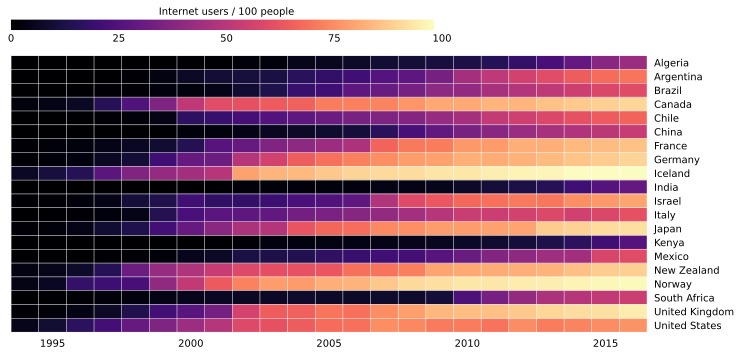

In [162]:
fig, ax = plt.subplots(figsize=(12,5))

data = filtered_internet_pivot.to_numpy()

# by modifying the aspect parameter in the imshow function. The aspect parameter controls the aspect ratio of the axes. 
# The default is 'equal', which means the aspect ratio is 1:1. If you want to make the panels wider, you can set aspect 
# to a value less than 1. For example, if you set aspect to 0.5, the width of each panel will be twice its height.
im = ax.imshow(data, cmap='magma', aspect=0.5) # 'equal'

labels_to_include=[1990, 1995, 2000, 2005, 2010, 2015]

row_labels=filtered_internet_pivot.index.to_list()
col_labels=filtered_internet_pivot.columns.to_list()

# Filter the col_labels list to only include the labels in labels_to_include
x_ticks = [i for i, label in enumerate(col_labels) if label in labels_to_include]
x_labels = [label for label in col_labels if label in labels_to_include]

# Show the ticks and label them with the respective list entries.
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
# on the y-axis we want all labels:
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticklabels(row_labels)

# customise where ticks and labels to appear
ax.tick_params(top=False, labeltop=False,
                labelbottom=True, bottom=False,
                left=False, labelleft=False,
                right=False, labelright=True)

# Change the fontsize of the tick labels
ax.tick_params(axis='both', labelsize=10)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="center")

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)

ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Create and style the colorbar in a separate axes
cax = fig.add_axes([ax.get_position().x0, 0.95, 0.5, 0.03])
cax.spines[:].set_visible(False)
cbar = mpl.colorbar.Colorbar(ax=cax, mappable=im, orientation='horizontal')
cbar.outline.set_visible(False)

cbar.ax.set_xticks([0, 25, 50, 75, 100])
cbar.ax.tick_params(bottom=False, colors='black', pad=0)

cbar.ax.set_title('Internet users / 100 people', fontsize=10, pad=5)

plt.show()

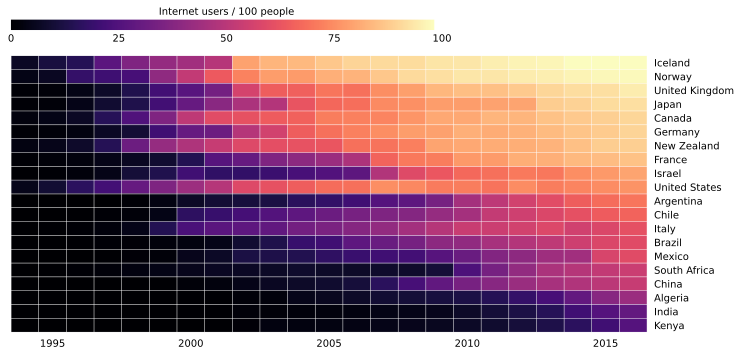

In [166]:
fig, ax = plt.subplots(figsize=(12,5))

df = filtered_internet_pivot.sort_values(by=2016, ascending=False)

data = df.to_numpy()

im = ax.imshow(data, cmap='magma', aspect=0.5) # 'equal'

labels_to_include=[1990, 1995, 2000, 2005, 2010, 2015]

row_labels = df.index.to_list()
col_labels = df.columns.to_list()

# Filter the col_labels list to only include the labels in labels_to_include
x_ticks = [i for i, label in enumerate(col_labels) if label in labels_to_include]
x_labels = [label for label in col_labels if label in labels_to_include]

# Show the ticks and label them with the respective list entries.
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
# on the y-axis we want all labels:
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticklabels(row_labels)

# customise where ticks and labels to appear
ax.tick_params(top=False, labeltop=False,
                labelbottom=True, bottom=False,
                left=False, labelleft=False,
                right=False, labelright=True)

# Change the fontsize of the tick labels
ax.tick_params(axis='both', labelsize=10)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="center")

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)

ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Create and style the colorbar in a separate axes
cax = fig.add_axes([ax.get_position().x0, 0.95, 0.5, 0.03])
cax.spines[:].set_visible(False)
cbar = mpl.colorbar.Colorbar(ax=cax, mappable=im, orientation='horizontal')
cbar.outline.set_visible(False)

cbar.ax.set_xticks([0, 25, 50, 75, 100])
cbar.ax.tick_params(bottom=False, colors='black', pad=0)

cbar.ax.set_title('Internet users / 100 people', fontsize=10, pad=5)

plt.show()

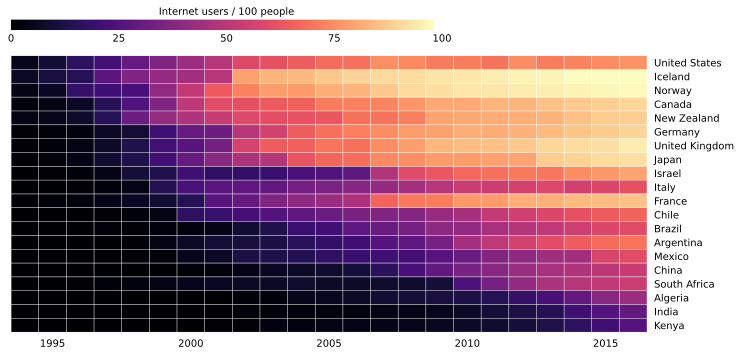

In [168]:
fig, ax = plt.subplots(figsize=(12,5))

df = filtered_internet_pivot

# Define a function that returns the first year a row exceeds a threshold
def first_year_exceeds_threshold(row, threshold):
    for year, value in row.items():
        if value > threshold:
            return year
    return np.inf  # Return infinity if no year exceeds the threshold

# Apply the function to each row
df['first_year'] = df.apply(first_year_exceeds_threshold, axis=1, threshold=20)

# Sort the DataFrame by the new column
df = df.sort_values('first_year')

# Drop the helper column
df = df.drop(columns=['first_year'])

data = df.to_numpy()

im = ax.imshow(data, cmap='magma', aspect=0.5) # 'equal'

labels_to_include=[1990, 1995, 2000, 2005, 2010, 2015]

row_labels = df.index.to_list()
col_labels = df.columns.to_list()

# Filter the col_labels list to only include the labels in labels_to_include
x_ticks = [i for i, label in enumerate(col_labels) if label in labels_to_include]
x_labels = [label for label in col_labels if label in labels_to_include]

# Show the ticks and label them with the respective list entries.
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
# on the y-axis we want all labels:
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticklabels(row_labels)

# customise where ticks and labels to appear
ax.tick_params(top=False, labeltop=False,
                labelbottom=True, bottom=False,
                left=False, labelleft=False,
                right=False, labelright=True)

# Change the fontsize of the tick labels
ax.tick_params(axis='both', labelsize=10)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="center")

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)

ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Create and style the colorbar in a separate axes
cax = fig.add_axes([ax.get_position().x0, 0.95, 0.5, 0.03])
cax.spines[:].set_visible(False)
cbar = mpl.colorbar.Colorbar(ax=cax, mappable=im, orientation='horizontal')
cbar.outline.set_visible(False)

cbar.ax.set_xticks([0, 25, 50, 75, 100])
cbar.ax.tick_params(bottom=False, colors='black', pad=0)

cbar.ax.set_title('Internet users / 100 people', fontsize=10, pad=5)

plt.show()